<link rel='stylesheet' href='../assets/css/main.css'/>

[<< back to main index](../README.md)

# Multiple Linear Regression Lab 5 : House Prices

### Overview
Estimate house prices using MLR

### Builds on
None

### Run time
approx. 20 minutes

### Notes



In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


## Step 1 : House data

In [2]:
housePrices = pd.read_csv("https://s3.amazonaws.com/elephantscale-public/data/house-prices/house-sales-full.csv")
housePrices.head()

DocumentID     Date  SalePrice  PropertyID   PropertyType      ym  zhvi_px  \
0           1  9/16/14     280000     1000102      Multiplex  9/1/14   405100   
1           2  6/16/06    1000000     1200013  Single Family  6/1/06   404400   
2           3  1/29/07     745000     1200019  Single Family  1/1/07   425600   
3           4  2/25/08     425000     2800016  Single Family  2/1/08   418400   
4           5  3/29/13     240000     2800024  Single Family  3/1/13   351600   

   zhvi_idx  AdjSalePrice  NbrLivingUnits  ...  Bathrooms  Bedrooms  \
0  0.930836      300805.0               2  ...       3.00         6   
1  0.929228     1076162.0               1  ...       3.75         4   
2  0.977941      761805.0               1  ...       1.75         4   
3  0.961397      442065.0               1  ...       3.75         5   
4  0.807904      297065.0               1  ...       1.75         4   

   BldgGrade  YrBuilt  YrRenovated  TrafficNoise  LandVal  ImpsVal  ZipCode  \
0          7     1991            0             0    70000   229000    98002   
1         10     2005            0             0   203000   590000    98166   
2          8     1947            0             0   183000   275000    98166   
3          7     1966            0             0   104000   229000    98168   
4          7     1948            0             0   104000   205000    98168   

   NewConstruction  
0            False  
1             True  
2            False  
3            False  
4            False  

[5 rows x 23 columns]

Wow! That's a lot of columns.  Maybe we should foucs on just a few of them.

**=> Select only "SalePrice", "Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot" **

In [3]:
# TODO: select only "SalePrice", "Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot"
columns = ["SalePrice", "Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot"]
housePrices_small = housePrices[columns]


housePrices_small.head()

SalePrice  Bedrooms  Bathrooms  SqFtTotLiving  SqFtLot
0     280000         6       3.00           2400     9373
1    1000000         4       3.75           3764    20156
2     745000         4       1.75           2060    26036
3     425000         5       3.75           3200     8618
4     240000         4       1.75           1720     8620

In [4]:
temp = preprocessing.normalize(housePrices_small)
normalized_housePrices_small = pd.DataFrame(temp)
type(normalized_housePrices_small)


pandas.core.frame.DataFrame

In [5]:
normalized_housePrices_small.columns  = columns
normalized_housePrices_small.head()

SalePrice  Bedrooms  Bathrooms  SqFtTotLiving   SqFtLot
0   0.999404  0.000021   0.000011       0.008566  0.033455
1   0.999790  0.000004   0.000004       0.003763  0.020152
2   0.999386  0.000005   0.000002       0.002763  0.034926
3   0.999766  0.000012   0.000009       0.007528  0.020273
4   0.999330  0.000017   0.000007       0.007162  0.035893

In [6]:
normalized_housePrices_small.isnull().sum()

SalePrice        0
Bedrooms         0
Bathrooms        0
SqFtTotLiving    0
SqFtLot          0
dtype: int64

In [7]:
normalized_housePrices_small.columns

Index(['SalePrice', 'Bedrooms', 'Bathrooms', 'SqFtTotLiving', 'SqFtLot'], dtype='object')

## Step 2: Create Features and Label Column in Dataframe

We will create our "features" column, which is of type vector, and our label column, for which we can just reuse the SquareFootage column.

**=> Build features with  "Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot" **

**=> Rename SalePrice as "label" **



In [8]:
features = normalized_housePrices_small.iloc[:,1:]
features.shape

(27063, 4)

In [9]:
label = normalized_housePrices_small['SalePrice']

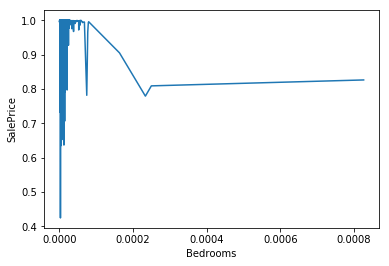

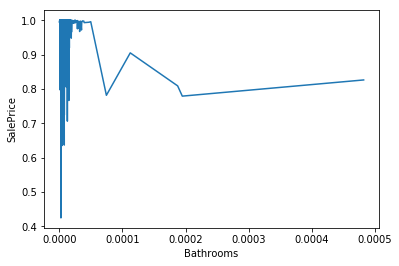

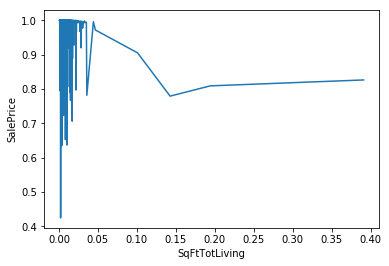

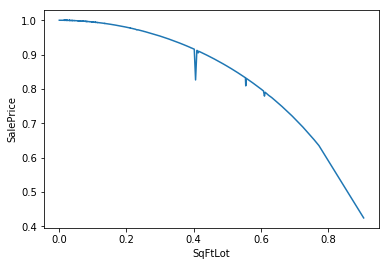

In [10]:
for feature in features :
    plt.figure()
    sns.lineplot(x=feature, y=label, data=normalized_housePrices_small)


In [11]:
#housePrices['SqFtLot'].max()
#housePrices[housePrices['SqFtLot']>43000].count()

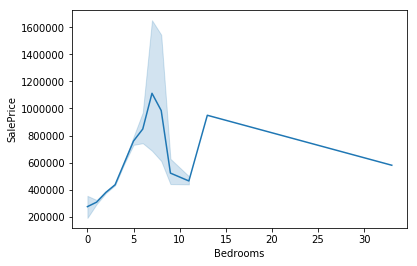

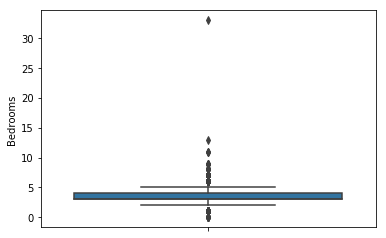

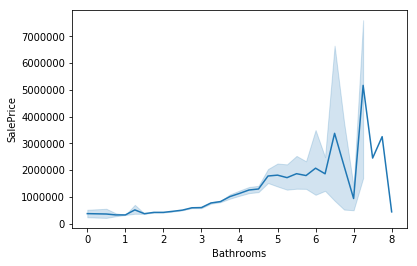

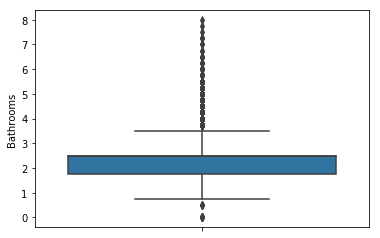

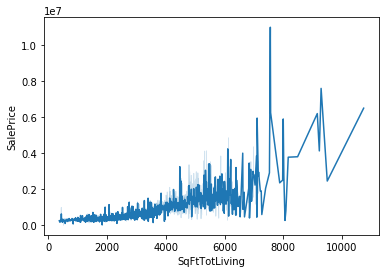

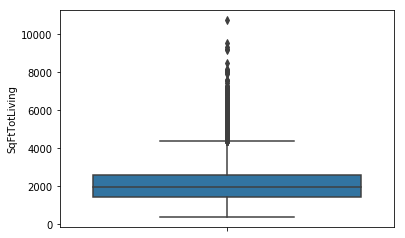

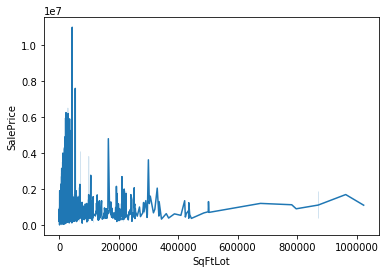

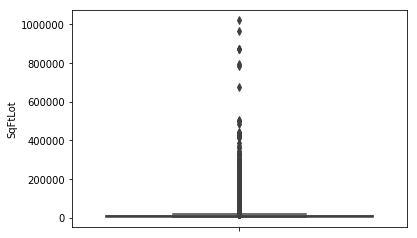

In [12]:
features = housePrices_small.iloc[:,1:]
features.shape

label = housePrices_small['SalePrice']

for feature in features :
    plt.figure()
    sns.lineplot(x=feature, y=label, data=housePrices_small)
    plt.figure()
    sns.boxplot(y=housePrices_small[feature])
    


In [14]:
lr = LinearRegression()
lrModel = lr.fit(features, label)

print("Coefficients: " + str(lrModel.coef_))
print("Intercept: " + str(lrModel.intercept_))

Coefficients: [-6.52117361e+04  1.62741914e+04  2.77848047e+02 -7.45705406e-02]
Intercept: 106303.30611510912


In [15]:
low = .03
high = .97
quant_df = housePrices_small.quantile([low, high])
quant_df

SalePrice  Bedrooms  Bathrooms  SqFtTotLiving   SqFtLot
0.03   200000.0       2.0       1.00          880.0   1147.00
0.97  1285000.0       5.0       3.75         4240.0  43064.62

In [16]:
housePrices_small = housePrices_small.apply(lambda x: x[(x>=quant_df.loc[low,x.name]) & 
                                    (x <= quant_df.loc[high,x.name])], axis=0)

housePrices_small.isnull().sum()

SalePrice        1566
Bedrooms          505
Bathrooms         705
SqFtTotLiving    1611
SqFtLot          1616
dtype: int64

In [17]:
housePrices_small.dropna(inplace =True)

In [18]:
housePrices_small.shape

(22502, 5)

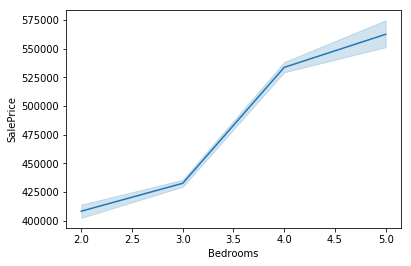

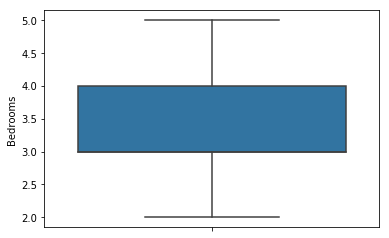

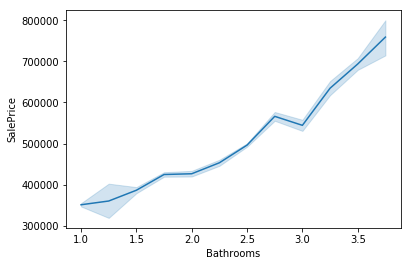

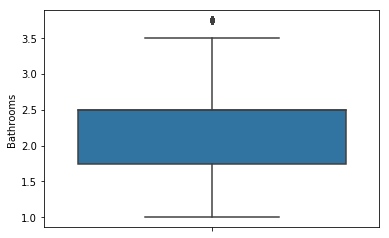

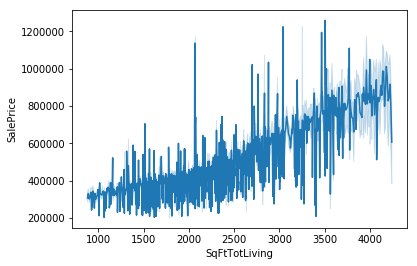

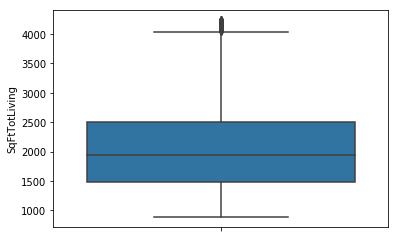

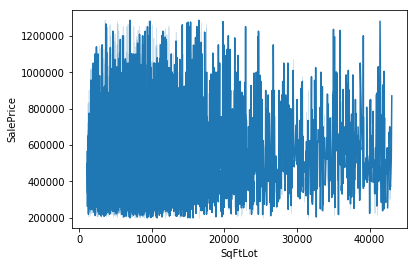

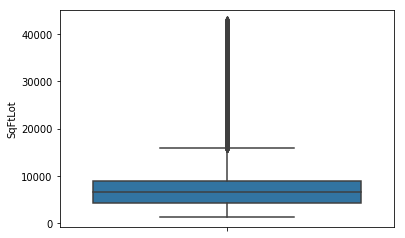

In [19]:
features = housePrices_small.iloc[:,1:]
label = housePrices_small['SalePrice']

for feature in features :
    plt.figure()
    sns.lineplot(x=feature, y=label, data=housePrices_small)
    plt.figure()
    sns.boxplot(y=housePrices_small[feature])
    



In [22]:
lr = LinearRegression()
lrModel = lr.fit(features, label)

print("Coefficients: " + str(lrModel.coef_))
print("Intercept: " + str(lrModel.intercept_))

Coefficients: [-3.99800430e+04  1.91533633e+03  1.94704635e+02 -1.23559949e+00]
Intercept: 214013.7981434336


##  Step 3: Run the Linear Regression Model

**=> Run model with max iterations as 10, regParam=0.3, elasticNetParam=0.8 **


In [ ]:
## Step 3: Run the Linear Regression Model
lr = LinearRegression()
lrModel = lr.fit(features, label)

print("Coefficients: " + str(lrModel.coef_))
print("Intercept: " + str(lrModel.intercept_))

**=> What is the meaning of coefficients and intercept? **

In [ ]:
from sklearn.metrics import classification_report


**Observe the summary output**

## Step 3:  Predict some home prices
Create a new data frame with the following data

In [27]:

# Make a Pandas dataframe
new_data = pd.DataFrame({'Bedrooms' : [5,3,2],
                         'Bathrooms' : [3,2,1.5],
                         'SqFtTotLiving' : [4400, 1800, 1550],
                         'SqFtLot' : [10000, 5000, 4000]
             })




## Step 4: Run on some prediction data

Lets see the predicted output.

**=>TODO: transform dataframe with new dataframe (.values) to get predictions **

In [28]:
predicted_prices = lrModel.predict(new_data.values)
predicted_prices

array([864203.99081592, 442194.68718638, 433776.50278428])